In [30]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

## Кросс-валидация

Загрузим уже знакомый вам датасет о диабете.

In [31]:
data = datasets.load_diabetes()
X = data['data']
y = data['target']


Мы хотим посмотреть, насколько хорошо работают наши модели при различных разбиениях данных. На лекции вы ознакомилимь в принципами работы  `k-Fold` кросс-валидации, давайте посмотрим как это работает на практике.

Выберем кол-во сплитов, на которое мы хотим разделить наши данные.

In [32]:
kf = KFold(n_splits=5)

Посмотрим, что выдает функция разбиения.

In [33]:
kf.split(X, y)

<generator object _BaseKFold.split at 0x000001582079D310>

Мы получаем генератор, посмотрим подробнее на небольшой подвыборке для наглядности.

In [34]:
for train, test in kf.split(X[:10], y[:10]): 
    print('Train: ', train, 'Test: ', test)


Train:  [2 3 4 5 6 7 8 9] Test:  [0 1]
Train:  [0 1 4 5 6 7 8 9] Test:  [2 3]
Train:  [0 1 2 3 6 7 8 9] Test:  [4 5]
Train:  [0 1 2 3 4 5 8 9] Test:  [6 7]
Train:  [0 1 2 3 4 5 6 7] Test:  [8 9]


При каждой итерации мы получаем два списка с индексами: тренировочные индексы и тестовые. Благодарая им мы можем на каждой итерации отделять разные тестовые выборки, чтобы посчитать метрики качества на них. На каждой итерации необходимо заново обучать модель и делать предсказания.




In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mse = []
mape = []
for train, test in kf.split(X, y): 
    # инициализируйте и обучить модель линейной регрессии
    model = LinearRegression().fit(X[train], y[train])
    
    # сделайте предсказание
    pred = model.predict(X[test])
    # посчитайте метрики и сохраните их
    mse.append(mean_squared_error(pred, y[test]))
    mape.append(mean_absolute_percentage_error(pred, y[test]))

Посмотрим, как меняются метрики качества во время кросс-валидации.

In [36]:
mse, np.mean(mse), np.std(mse)

([2779.9234492116857,
  3028.836338828591,
  3237.68758770406,
  3008.7464888418867,
  2910.2126877604296],
 2993.0813104693307,
 150.77104043857528)

In [37]:
mape, np.mean(mape), np.std(mape)

([0.3297511240066471,
  0.31859464697801276,
  0.3345220536390395,
  0.2956099085228104,
  0.29162290515534556],
 0.314020127660371,
 0.017488803198054757)

## Решающие деревья.

1. Повторите эксперимент с кросс-валидацией для решающих деревьев. Сравните полученные значения с метриками выше.

In [50]:
from sklearn.tree import DecisionTreeRegressor

mse = []
mape = []
for train, test in kf.split(X, y): 
    # инициализируйте и обучить дерево
    clf = DecisionTreeRegressor().fit(X[train], y[train])

    # сделайте предсказание
    pred = clf.predict(X[test])
    
    # посчитайте метрики и сохраните их
    mse.append(mean_squared_error(pred, y[test]))
    mape.append(mean_absolute_percentage_error(pred, y[test]))

In [39]:
mse, np.mean(mse), np.std(mse)

([6284.314606741573,
  6532.438202247191,
  7323.318181818182,
  5406.181818181818,
  7152.511363636364],
 6539.752834525026,
 684.0662408903423)

In [40]:
mape, np.mean(mape), np.std(mape)

([0.5963165097154932,
  0.5295464671966563,
  0.575775932787295,
  0.4261446507174771,
  0.5427054067883925],
 0.5340977934410629,
 0.05891845645673524)

Решающее дерево имеет худшие метрики по mse и mape. Проверим, что дерево переобучается на train

2. Постройте графики зависимости качества модели от глубины дерева. Качество модели измеряйте с помощью MSE, MAE и MAPE (должно получиться три отдельные картинки). Сделайте выводы.


    *Указание: в этой задаче кросс-валидацию использовать не нужно.*

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

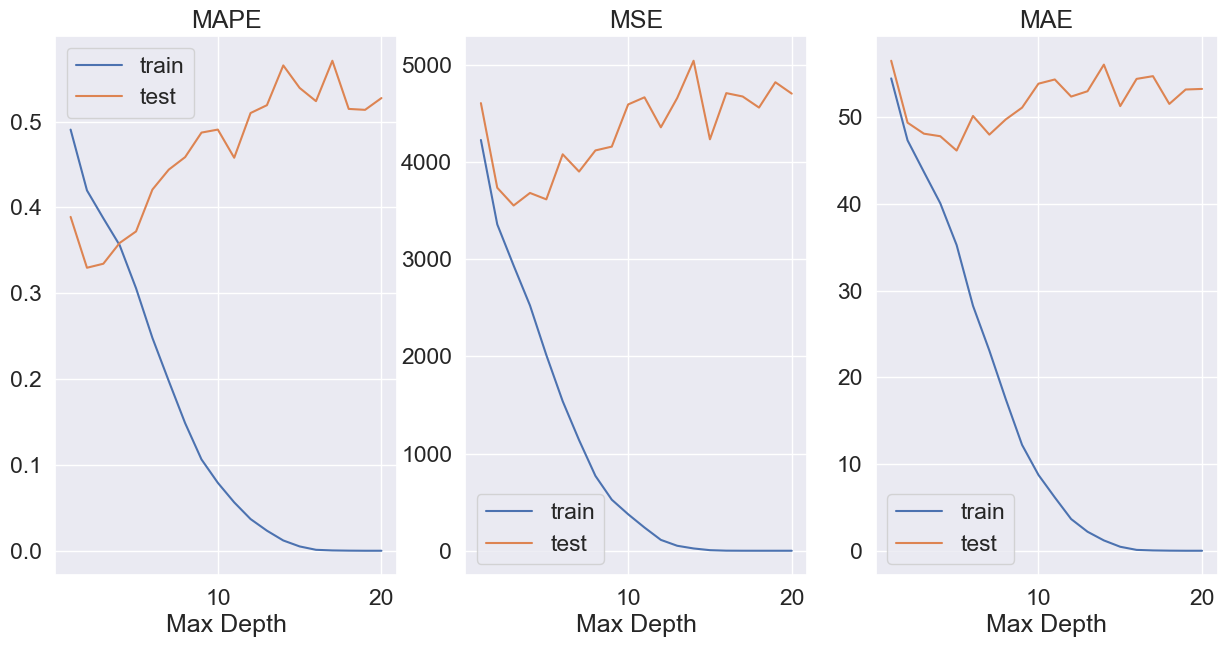

In [64]:
from sklearn.metrics import mean_absolute_error

mse_train,mse_test = [],[]
mape_train, mape_test = [],[]

mae_train,mae_test = [],[]

from sklearn.tree import DecisionTreeRegressor

depthes = range(1,21)

for i in depthes:
    clf = DecisionTreeRegressor(max_depth=i).fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    mse_train.append(mean_squared_error(y_train, pred_train))
    mape_train.append(mean_absolute_percentage_error(y_train, pred_train))
    mae_train.append(mean_absolute_error(y_train, pred_train))
    pred_test = clf.predict(X_test)
    mape_test.append(mean_absolute_percentage_error(pred_test, y_test))
    mse_test.append(mean_squared_error(pred_test, y_test))
    mae_test.append(mean_absolute_error(pred_test, y_test))

fig,ax  =plt.subplots(1,3,figsize=(15,7))

ax[0].plot(depthes, mape_train,label='train')
ax[0].plot(depthes, mape_test,label='test')
ax[0].set(title='MAPE',xlabel='Max Depth')
ax[0].legend()

ax[1].plot(depthes, mse_train,label='train')
ax[1].plot(depthes, mse_test,label='test')
ax[1].set(title='MSE',xlabel='Max Depth')
ax[1].legend()

ax[2].plot(depthes, mae_train,label='train')
ax[2].plot(depthes, mae_test,label='test')
ax[2].set(title='MAE',xlabel='Max Depth')
ax[2].legend()


**Вывод:** при увеличении глубины дерево переобучается. Ошибка на тесте растёт. Гиперпараметр глубина деерево подбираем через кроссвалидацю. Иначе можем переобучиться через оптимизацию параметра на тесте.